In [1]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('/Users/kirtan/Downloads/Churn_Modelling/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Train & Test Split

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.iloc[:,3:13]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [7]:
y = df.iloc[:,13]
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Feature Engineering

In [8]:
Geography = pd.get_dummies(X['Geography'],drop_first=True)
Geography

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [9]:
Gender = pd.get_dummies(X['Gender'],drop_first=True)
Gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [10]:
X = X.drop(['Gender','Geography'], axis=1)

In [11]:
#Concate these 2 with X
X = pd.concat([X,Geography,Gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
Sd = StandardScaler()

In [15]:
#TO AVOID DATA LEAK 
X_train_SD = Sd.fit_transform(X_train)
X_test_SD = Sd.transform(X_test)

# ANN

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [17]:
#Initialize the ANN
classifier = Sequential()

2023-07-12 23:07:51.117870: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-07-12 23:07:51.117893: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-07-12 23:07:51.117899: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-07-12 23:07:51.117940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-07-12 23:07:51.117957: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
#Input layer
classifier.add(Dense(units=11,activation='relu'))
classifier.add(Dropout(0.3))

In [19]:
#Hidden Layer 1
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [20]:
#Hidden Layer 2
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.2))
#Here Units represent the number of neurons

In [21]:
#Output Layer
classifier.add(Dense(1,activation='sigmoid'))

In [22]:
#Adam uses learning rate as 0.01 by default
#To chamge it
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Define the optimizer
optm = Adam(learning_rate=0.001)

# Compile the model with the optimizer
classifier.compile(optimizer=optm, loss='binary_crossentropy', metrics=['accuracy'])

In [23]:
#Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001, 
    patience=20, 
    verbose=1, 
    mode= 'auto',
    baseline=None, 
    restore_best_weights=False,
)

In [24]:
model_history = classifier.fit(X_train_SD, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping, validation_data=(X_test_SD,y_test))

Epoch 1/1000


2023-07-12 23:07:51.599801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


798/800 [============================>.] - ETA: 0s - loss: 0.5538 - accuracy: 0.7323

2023-07-12 23:07:58.113517: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


800/800 [==============================] - 7s 8ms/step - loss: 0.5533 - accuracy: 0.7326 - val_loss: 0.4602 - val_accuracy: 0.8000
Epoch 2/1000
800/800 [==============================] - 7s 8ms/step - loss: 0.4623 - accuracy: 0.7954 - val_loss: 0.4474 - val_accuracy: 0.8040
Epoch 3/1000
800/800 [==============================] - 6s 8ms/step - loss: 0.4499 - accuracy: 0.7983 - val_loss: 0.4682 - val_accuracy: 0.7975
Epoch 4/1000
800/800 [==============================] - 6s 8ms/step - loss: 0.4514 - accuracy: 0.8027 - val_loss: 0.4442 - val_accuracy: 0.8015
Epoch 5/1000
800/800 [==============================] - 6s 8ms/step - loss: 0.4579 - accuracy: 0.8006 - val_loss: 0.4645 - val_accuracy: 0.7995
Epoch 6/1000
800/800 [==============================] - 6s 8ms/step - loss: 0.4769 - accuracy: 0.7936 - val_loss: 0.4623 - val_accuracy: 0.7990
Epoch 7/1000
800/800 [==============================] - 6s 8ms/step - loss: 0.5086 - accuracy: 0.7870 - val_loss: 0.4650 - val_accuracy: 0.8045
Epoch

In [25]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

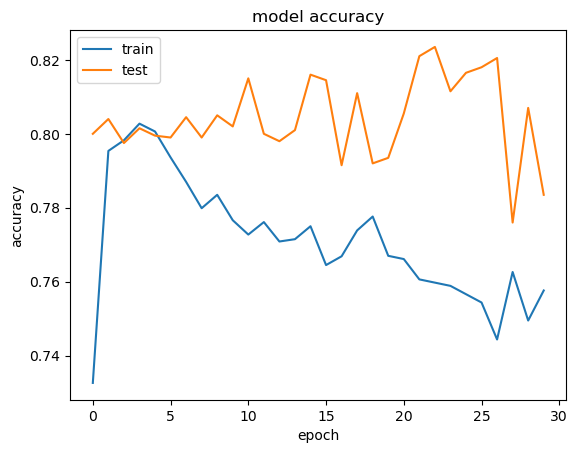

In [26]:
#Summarize the model
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

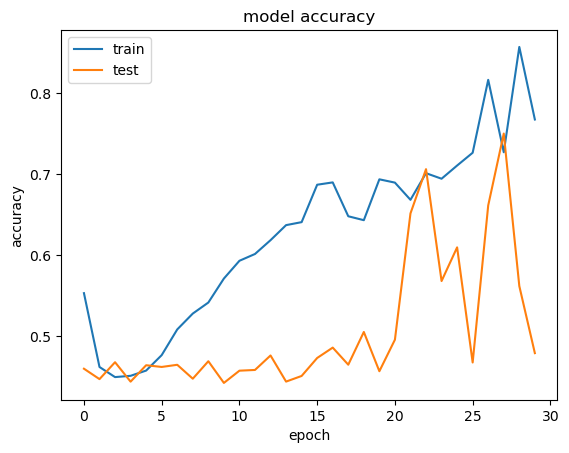

In [27]:
#Summarize the model
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

# Model Evalution

In [28]:
y_pred = classifier.predict(X_test_SD)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


2023-07-12 23:11:05.576740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [30]:
print(confusion_matrix(y_test,y_pred))

[[1535   60]
 [ 373   32]]


In [31]:
print(accuracy_score(y_test,y_pred))

0.7835


In [32]:
# Get the weights
classifier.get_weights()

[array([[-3.25003624e-01, -3.17918956e-02, -3.65476668e-01,
         -3.61859828e-01, -2.32075416e-02, -6.57294169e-02,
         -1.34264782e-01, -1.30613551e-01, -1.14964284e-01,
         -1.28290653e-01,  4.45783556e-01],
        [ 2.87423420e+00, -3.28761506e+00,  4.07356691e+00,
          4.45776272e+00,  3.15700459e+00, -2.19386101e-01,
          1.41543895e-01,  6.91785216e-01,  6.07618392e-01,
          1.17731404e+00, -3.45724511e+00],
        [ 3.07485182e-03, -4.72392440e-01,  2.56257862e-01,
          4.12905142e-02,  1.04795843e-01, -5.88045895e-01,
         -1.21944062e-01, -1.03697471e-01, -9.84277427e-02,
         -1.67851523e-01, -5.14098816e-02],
        [-1.15738404e+00, -1.35143566e+00, -7.04638779e-01,
         -1.82543933e+00,  7.10139215e-01, -1.02649617e+00,
         -1.14183974e+00,  1.00027239e+00,  8.43833983e-01,
          1.05714691e+00,  4.44809616e-01],
        [-2.31815171e+00,  4.75518560e+00, -2.34489322e+00,
         -2.90003204e+00,  3.86608791e+00, -